# Лабораторна робота 3

Варіант = №3.

## Вправа 1

Виведіть перші 8 рядків набору даних.

In [1]:
import numpy as np
import pandas as pd

df = pd.read_csv('./NationalNames.csv')
df[:8]

,Id,Name,Year,Gender,Count
0,1,Mary,1880,F,7065
1,2,Anna,1880,F,2604
2,3,Emma,1880,F,2003
3,4,Elizabeth,1880,F,1939
4,5,Minnie,1880,F,1746
5,6,Margaret,1880,F,1578
6,7,Ida,1880,F,1472
7,8,Alice,1880,F,1414


## Вправа 2

Вивести останні 8 рядків набору даних.

In [2]:
df.tail(8)

,Id,Name,Year,Gender,Count
1825425,1825426,Zo,2014,M,5
1825426,1825427,Zyeir,2014,M,5
1825427,1825428,Zyel,2014,M,5
1825428,1825429,Zykeem,2014,M,5
1825429,1825430,Zymeer,2014,M,5
1825430,1825431,Zymiere,2014,M,5
1825431,1825432,Zyran,2014,M,5
1825432,1825433,Zyrin,2014,M,5


## Вправа 4

Отримайте загальну інформацію про дані у наборі даних.

In [3]:
sub_df = df[['Id', 'Year', 'Count']]
sub_df.describe()

,Id,Year,Count
count,1.825433e+06,1.825433e+06,1.825433e+06
mean,9.127170e+05,1.972620e+03,1.846879e+02
std,5.269573e+05,3.352891e+01,1.566711e+03
min,1.000000e+00,1.880000e+03,5.000000e+00
25%,4.563590e+05,1.949000e+03,7.000000e+00
50%,9.127170e+05,1.982000e+03,1.200000e+01
75%,1.369075e+06,2.001000e+03,3.200000e+01
max,1.825433e+06,2.014000e+03,9.968000e+04


## Вправа 5

Знайдіть кількість унікальних імен у наборі даних

In [4]:
df['Name'].nunique()

93889

## Вправа 6

Обчисліть кількість унікальних жіночих та чоловічих імен у цілому
наборі даних

In [5]:
df.groupby('Gender').nunique()['Name']

Gender
F    64911
M    39199
Name: Name, dtype: int64

## Вправа 7

Знайдіть 5 найпопулярніших чоловічих імен у 2010 році

In [6]:
df[(df['Year'] == 2010) & (df['Gender'] == 'M')].sort_values('Count', ascending=False)[:5]

,Id,Name,Year,Gender,Count
1677392,1677393,Jacob,2010,M,22082
1677393,1677394,Ethan,2010,M,17985
1677394,1677395,Michael,2010,M,17308
1677395,1677396,Jayden,2010,M,17152
1677396,1677397,William,2010,M,17030


## Вправа 8

Знайдіть найпопулярніше ім’я за результатами одного року (ім’я, для
якого Count максимальне)

In [7]:
pop_name = df.sort_values('Count', ascending=False)[:1]
print(f"This name is '{pop_name.iloc[0,1]}' in {pop_name.iloc[0,2]}")

This name is 'Linda' in 1947


## Вправа 9

Підрахуйте кількість записів, для яких Count - мінімальне у наборі.

In [8]:
len(df[df['Count'] == df['Count'].min()])

254615

## Вправа 10

Підрахуйте кількість унікальних імен у кожному році

In [9]:
df.groupby('Year')['Name'].nunique()[:8]

Year
1880    1889
1881    1830
1882    2012
1883    1962
1884    2158
1885    2139
1886    2225
1887    2215
Name: Name, dtype: int64

## Вправа 11

Знайдіть рік із найбільшою кількістю унікальних імен.

In [10]:
print(df.groupby('Year').nunique().sort_values('Name', ascending=False)[0:1]['Name'])

Year
2008    32488
Name: Name, dtype: int64


## Вправа 12

Знайдіть найпопулярніше ім’я в році з найбільшою кількістю
унікальних імен (тобто у 2008 році)

In [11]:
most_ppl_year = 2008 # was calculated on the previous step
print(df[df['Year'] == 2008].sort_values('Count', ascending=False)[0:1].iloc[0,1])

Jacob


## Вправа 18

Підрахуйте кількість років, коли дівчаток народжувалось більше,
ніж хлопчиків.

In [12]:
genderByYear = df.groupby(['Year', 'Gender'])['Count'].sum().unstack()
genderByYear[genderByYear['F'] > genderByYear['M']].shape[0]

54

## Вправа 19

Накресліть графік загальної кількості народжень хлопчиків та
дівчаток на рік.

<Axes: xlabel='Year'>

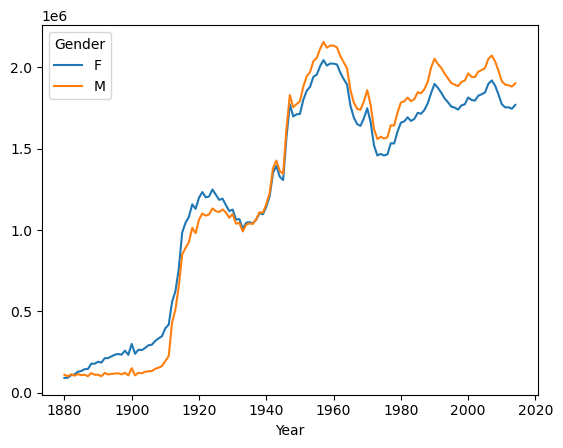

In [13]:
genderByYear.plot()

## Вправа 20

Підрахуйте кількість гендерно-нейтральних імен (однакових для
дівчат та хлопців)

In [14]:
male_names = df[df['Gender'] == 'M'].groupby(['Name'])['Count'].sum()
female_names = df[df['Gender'] == 'F'].groupby(['Name'])['Count'].sum()

gender_neutral_names = male_names.index.intersection(female_names.index)
gender_neutral_names.size

10221

## Вправа 21

Порахуйте, скільки разів хлопчиків називали Barbara

In [15]:
df[(df['Name'] == 'Barbara') & (df['Gender'] == 'M')]['Count'].sum()

4139

## Вправа 23

Знайти найпопулярніші гендерно-нейтральні імена (ті, що присутні
кожного року)

In [16]:
num_of_years = len(df['Year'].unique())

popular_gender_neutral_names = df[df['Name'].isin(gender_neutral_names)].groupby('Name').filter(lambda x: x['Year'].nunique() == num_of_years)['Name'].unique()
pd.DataFrame(data=popular_gender_neutral_names)

,0
0,Mary
1,Anna
2,Emma
3,Elizabeth
4,Minnie
...,...
818,Noble
819,Rupert
820,Thad
821,Kelly


## Вправа 25

Побудувати графіки розподілення кількості імен John та Mary по
роках без залежності до статі.

<Axes: xlabel='Year'>

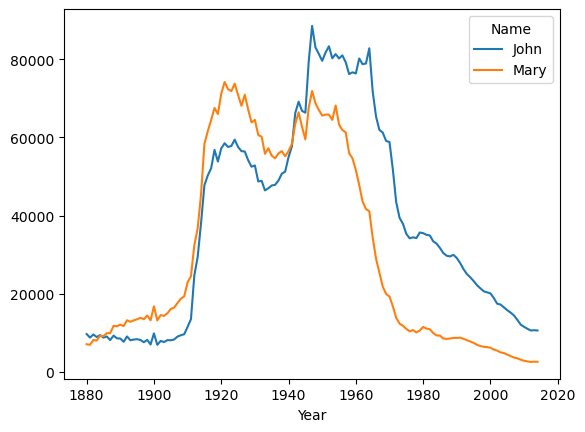

In [17]:
df[(df['Name'] == 'John') | (df['Name'] == 'Mary')].drop(columns=['Gender']).groupby(['Year', 'Name'])['Count'].sum().unstack().plot()

## Вправа 27

Знайти найпопулярніші імена в кожному році.

In [18]:
df.sort_values('Count', ascending=False).groupby('Year').aggregate({'Name': 'first', 'Count': 'first'})

,Name,Count
Year,,
1880,John,9655
1881,John,8769
1882,John,9557
1883,John,8894
1884,John,9388
...,...,...
2010,Isabella,22883
2011,Sophia,21816
2012,Sophia,22267
